In [23]:
import jsonlines
import json
import polars as pl

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

In [25]:
# lines contains all log lines
lines = []
with jsonlines.open('logs.jsonl') as reader:
    for log in reader:
        lines.append(json.JSONDecoder().decode(log['line']))
lines[:3]

[{'level': 30,
  'time': 1748016000227,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/otp?/approve',
  'body': {'txnId': '2406642583', 'otp': '111111'},
  'msg': 'transaction patch attempt'},
 {'level': 30,
  'time': 1748016000227,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/otp?/approve',
  'requestHandleTime': 0.03625600039958954},
 {'level': 30,
  'time': 1748016000577,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'PATCH',
  'url': 'https://enotaryo.crabdance.com/api/otpTransaction',
  'requestHandleTime': 0.016787000000476837}]

In [26]:
# lines containing all testing log lines
testing_lines = []
with jsonlines.open('tester_logs.jsonl') as reader:
    for log in reader:
        testing_lines.append(json.JSONDecoder().decode(log['line']))
testing_lines[:3]

[{'level': 30,
  'time': 1748016000849,
  'pid': 1020205,
  'start': '11:59:45 PM',
  'document': 0,
  'msg': 'finished test #a-0'},
 {'level': 30,
  'time': 1748016002122,
  'pid': 1020205,
  'start': '11:59:45 PM',
  'msg': 'navigating to document: a-1'},
 {'level': 30,
  'time': 1748016002141,
  'pid': 1020205,
  'start': '11:59:45 PM',
  'msg': 'clicking file input: a-1'}]

In [27]:
# get error messages

errors = []

with jsonlines.open('logs.jsonl') as reader:
    for log in reader:
        if log['labels']['level'] == 'error':
            errors.append(json.JSONDecoder().decode(log['line']))

errors

[{'level': 50,
  'time': 1748016010540,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/document',
  'signature': '6580954839',
  'reason': {'name': 'WebPushError',
   'message': 'Received unexpected response code',
   'statusCode': 404,
   'headers': {'content-security-policy-report-only': "script-src 'none'; form-action 'none'; frame-src 'none'; report-uri https://csp.withgoogle.com/csp/goa-520bfc14_2",
    'content-type': 'text/plain; charset=utf-8',
    'cross-origin-opener-policy': 'same-origin',
    'vary': 'Sec-Fetch-Site, Sec-Fetch-Mode, Sec-Fetch-Dest',
    'x-content-type-options': 'nosniff',
    'x-frame-options': 'SAMEORIGIN',
    'x-xss-protection': '0',
    'date': 'Fri, 23 May 2025 16:00:10 GMT',
    'content-length': '135',
    'alt-svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'},
   'body': 'A valid push subscription endpoint should be specified in the URL as such: https://fcm.googleapis.com/wp/dHIoDxE7H

In [28]:
webpush = 0
othererrs = []
for entry in errors:
    if entry.get('reason', None) is not None:
        webpush=webpush+1
    else:
        
        othererrs.append(entry)

webpush

8646

In [29]:
othererrs

[{'level': 50,
  'time': 1748016120224,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/api/signature',
  'e': {'name': 'PostgresError',
   'severity_local': 'ERROR',
   'severity': 'ERROR',
   'code': '23503',
   'detail': 'Key (document_id)=(9611fb54-d935-4400-a12c-ac9ff457b560) is not present in table "document".',
   'schema_name': 'app',
   'table_name': 'signature',
   'constraint_name': 'signature_document_id_document_id_fk',
   'file': 'ri_triggers.c',
   'line': '2599',
   'routine': 'ri_ReportViolation'}},
 {'level': 50,
  'time': 1748016120240,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/document',
  'signature': '6580954839',
  'error': {'message': 'an internal server error occurred'},
  'msg': 'form action failed'},
 {'level': 50,
  'time': 1748021921975,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance

In [30]:
# routines contains all lines relevant to routines
routines = list(filter(lambda x: x.get('routine', None) is not None, lines))

routines[:3]

[{'level': 30,
  'time': 1748016000928,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'PATCH',
  'url': 'https://enotaryo.crabdance.com/api/otpTransaction',
  'routine': 'b3',
  'elapsedTime': 350.1578550003469,
  'msg': 'routine b3'},
 {'level': 30,
  'time': 1748016003717,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/api/document',
  'routine': 'a3.1',
  'elapsedTime': 369.9873789995909,
  'msg': 'routine a3.1'},
 {'level': 30,
  'time': 1748016004130,
  'pid': 1,
  'clientAddress': '172.22.0.1',
  'method': 'PATCH',
  'url': 'https://enotaryo.crabdance.com/api/otpTransaction',
  'routine': 'b4',
  'elapsedTime': 2852.8324120007455,
  'msg': 'routine b4'}]

In [31]:
len(routines)

104757

In [32]:
# put all routine times into a dictionary
from collections import defaultdict

routine_times = defaultdict(list)

for routine in routines:
    routine_name = routine['routine']
    elapsed_time = routine['elapsedTime']
    routine_times[routine_name].append(elapsed_time)

routine_times = dict(routine_times)
routine_mean_times = [dict(routine_times)]

routine_key = sorted(list(routine_times.keys()))
routine_key

['a1',
 'a2',
 'a3.1',
 'a3.2',
 'a4',
 'a5',
 'a6',
 'a7',
 'a8',
 'a9',
 'b1',
 'b2',
 'b3',
 'b4',
 'b5.1',
 'b5.2',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'd1']

In [33]:
routineMeans = []
for key in routine_key:
    routineMeans.append(sum(routine_times[key]) / len(routine_times[key]))

C:\Users\jaman\AppData\Local\Temp\ipykernel_26732\1660679338.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


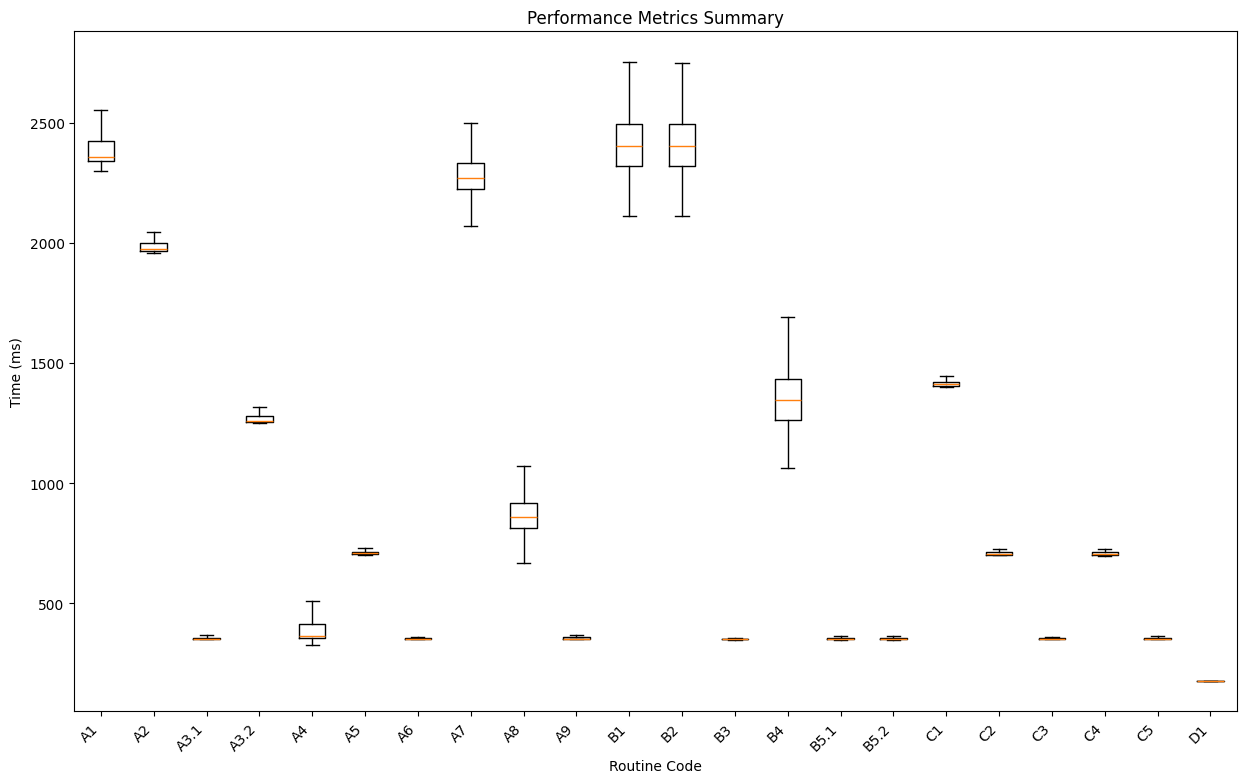

In [34]:
data = []
labels = []
for key in routine_key:
    data.append(routine_times[key])
    labels.append(key.upper())

fig, ax = plt.subplots(figsize = (15, 10))
stats = cbook.boxplot_stats(data, labels=labels)
ax.bxp(stats, showfliers=False)
ax.set_xlabel('Routine Code')
ax.set_ylabel('Time (ms)')

fig.autofmt_xdate(rotation=45)
plt.title('Performance Metrics Summary')


fig.show()


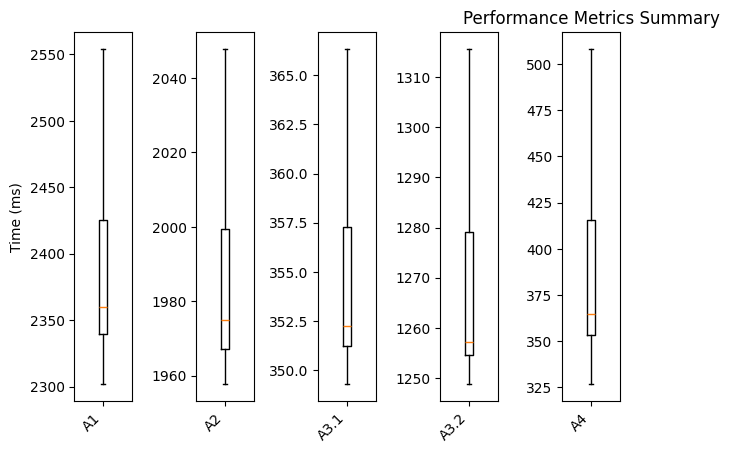

In [35]:
data = []
labels = []
for key in routine_key:
    data.append(routine_times[key])
    labels.append(key.upper())

fig, axs = plt.subplots(1, 5)

data1 = data[:5]
for i , ax in enumerate(axs.flatten()):
    if (i == 0):
        ax.set_ylabel('Time (ms)')
    
    stats = cbook.boxplot_stats(data1[i], labels=[labels[i]])
    ax.bxp(stats, showfliers=False)

plt.tight_layout()
plt.title('Performance Metrics Summary')
fig.autofmt_xdate(rotation=45)
plt.show()


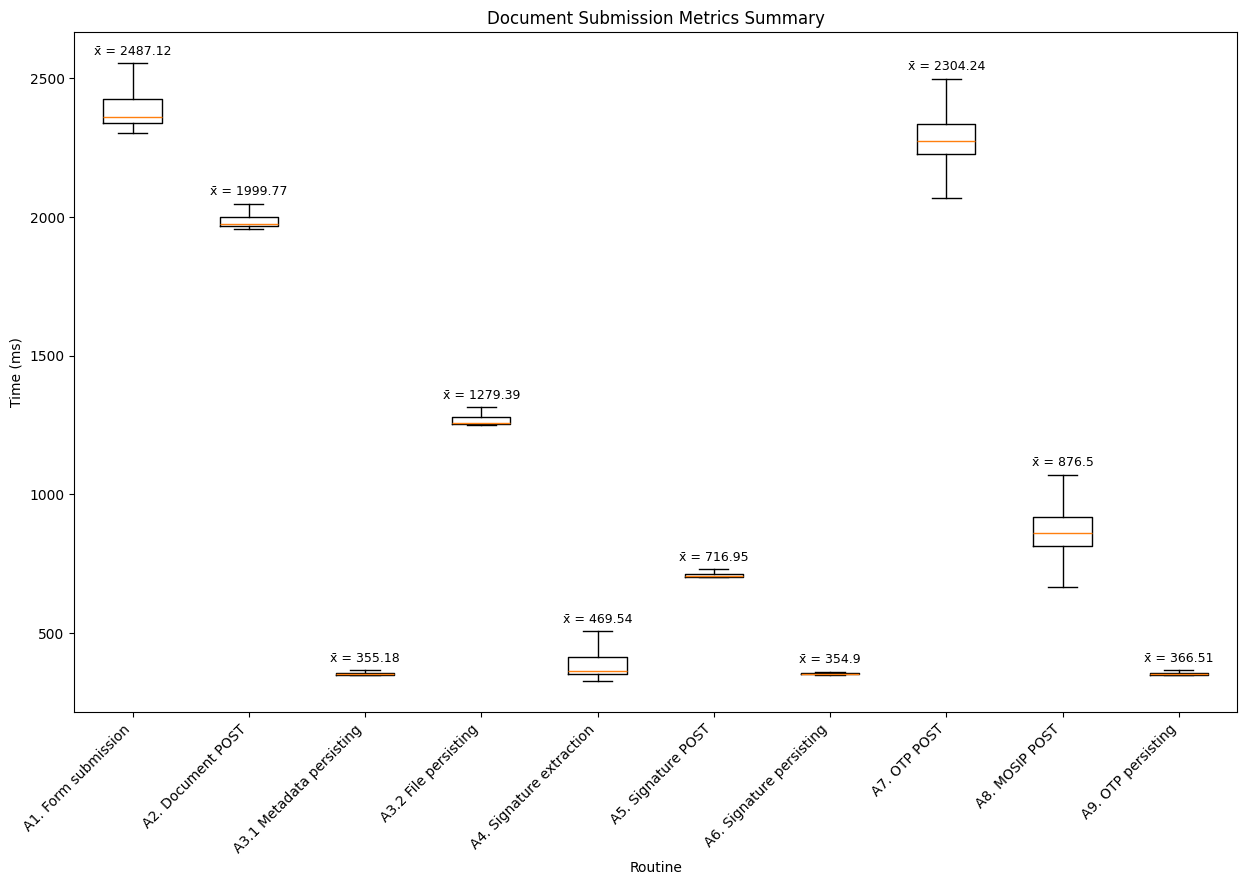

In [55]:
labels=[
    "A1. Form submission",
    "A2. Document POST",
    "A3.1 Metadata persisting", 
    "A3.2 File persisting",
    "A4. Signature extraction",
    "A5. Signature POST",
    "A6. Signature persisting",
    "A7. OTP POST",
    "A8. MOSIP POST",
    "A9. OTP persisting"
]

fig, ax = plt.subplots(figsize = (15, 10))
stats = cbook.boxplot_stats(data[:10], labels=labels)
ax.bxp(stats, showfliers=False)
ax.set_title('Document Submission Metrics Summary')
ax.set_xlabel('Routine')
ax.set_ylabel('Time (ms)')

upper =[]
for i in range(len(stats)):
    upper.append(stats[i]['whishi'])


routineMeans1 = routineMeans[:10]
for i, v in enumerate(routineMeans1):
    plt.text(i+1, upper[i]+30, "x\u0304 = "+str(round(float(v), 2)), ha = 'center', fontsize=9)

fig.autofmt_xdate(rotation=45)
plt.show()

In [38]:
routineMeans

[2487.123466662698,
 1999.771945129445,
 355.1808570309573,
 1279.3860924850076,
 469.53837683103944,
 716.9500085890443,
 354.8961865696161,
 2304.2417469132797,
 876.4957833228942,
 366.5053002220509,
 2372.937910690309,
 2372.7177096985833,
 352.6659504701648,
 1313.162643889485,
 353.73753516790305,
 353.1889834445054,
 1416.7231106620345,
 708.2759619893642,
 353.82609906889513,
 707.7689616476714,
 354.0021746355526,
 178.04280500113964]

[2487.123466662698, 1999.771945129445, 355.1808570309573, 1279.3860924850076, 469.53837683103944, 716.9500085890443, 354.8961865696161, 2304.2417469132797, 876.4957833228942, 366.5053002220509]


C:\Users\jaman\AppData\Local\Temp\ipykernel_26732\1183023860.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


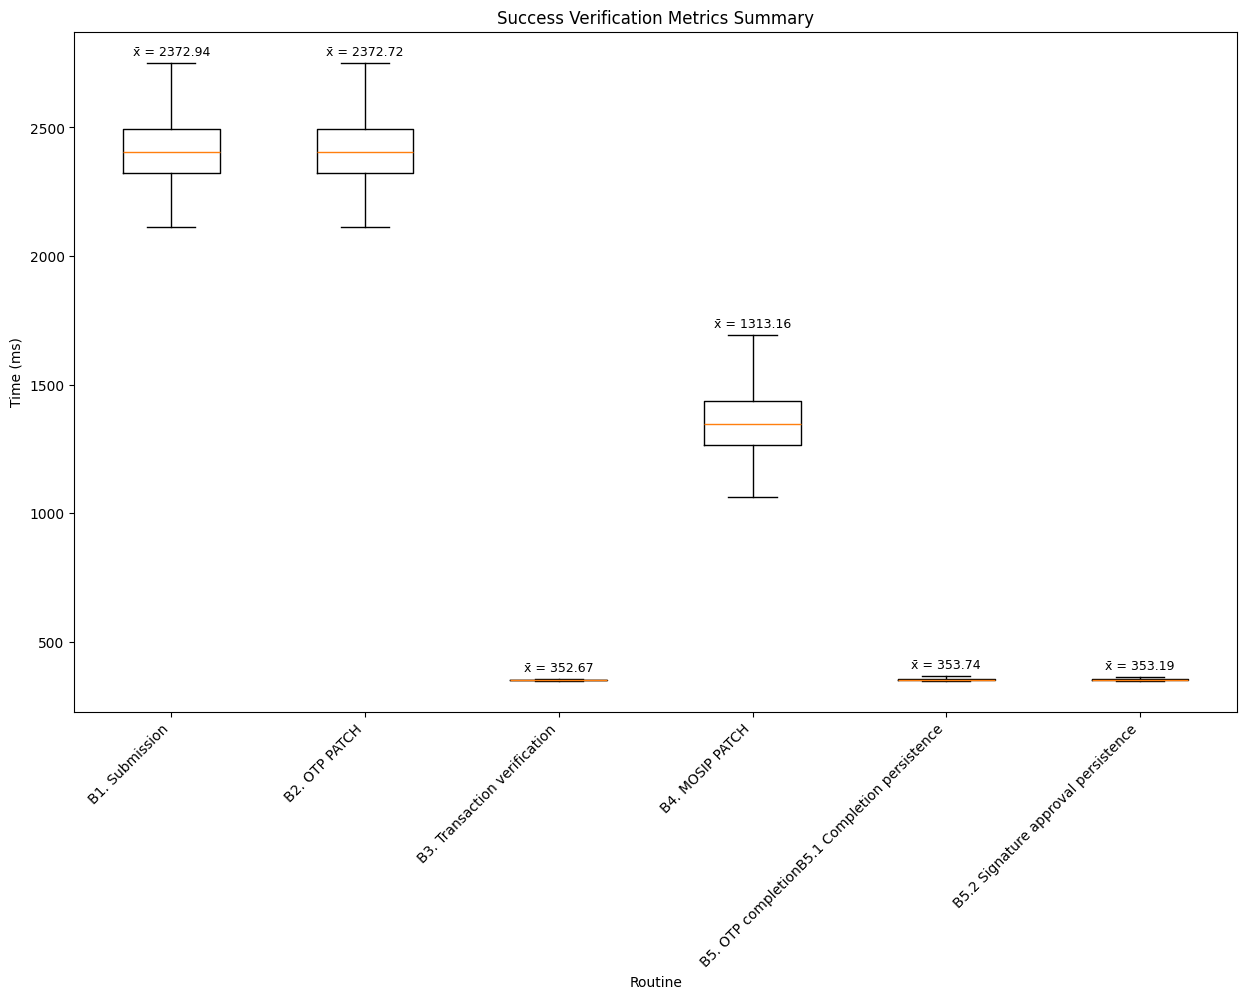

In [56]:
labels=[
    "B1. Submission",
    "B2. OTP PATCH",
    "B3. Transaction verification",
    "B4. MOSIP PATCH",
    "B5. OTP completion" 
    "B5.1 Completion persistence",
    "B5.2 Signature approval persistence"
]

fig, ax = plt.subplots(figsize = (15, 10))
stats = cbook.boxplot_stats(data[10:16], labels=labels)
ax.bxp(stats, showfliers=False)
ax.set_title('Success Verification Metrics Summary')
ax.set_xlabel('Routine')
ax.set_ylabel('Time (ms)')

upper =[]
for i in range(len(stats)):
    upper.append(stats[i]['whishi'])

routineMeans2 = routineMeans[10:16]
print(routineMeans1)
for i, v in enumerate(routineMeans2):
    plt.text(i+1, upper[i]+30, "x\u0304 = "+str(round(float(v), 2)), ha = 'center', fontsize=9)

fig.autofmt_xdate(rotation=45)
fig.show()

C:\Users\jaman\AppData\Local\Temp\ipykernel_26732\4166359215.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


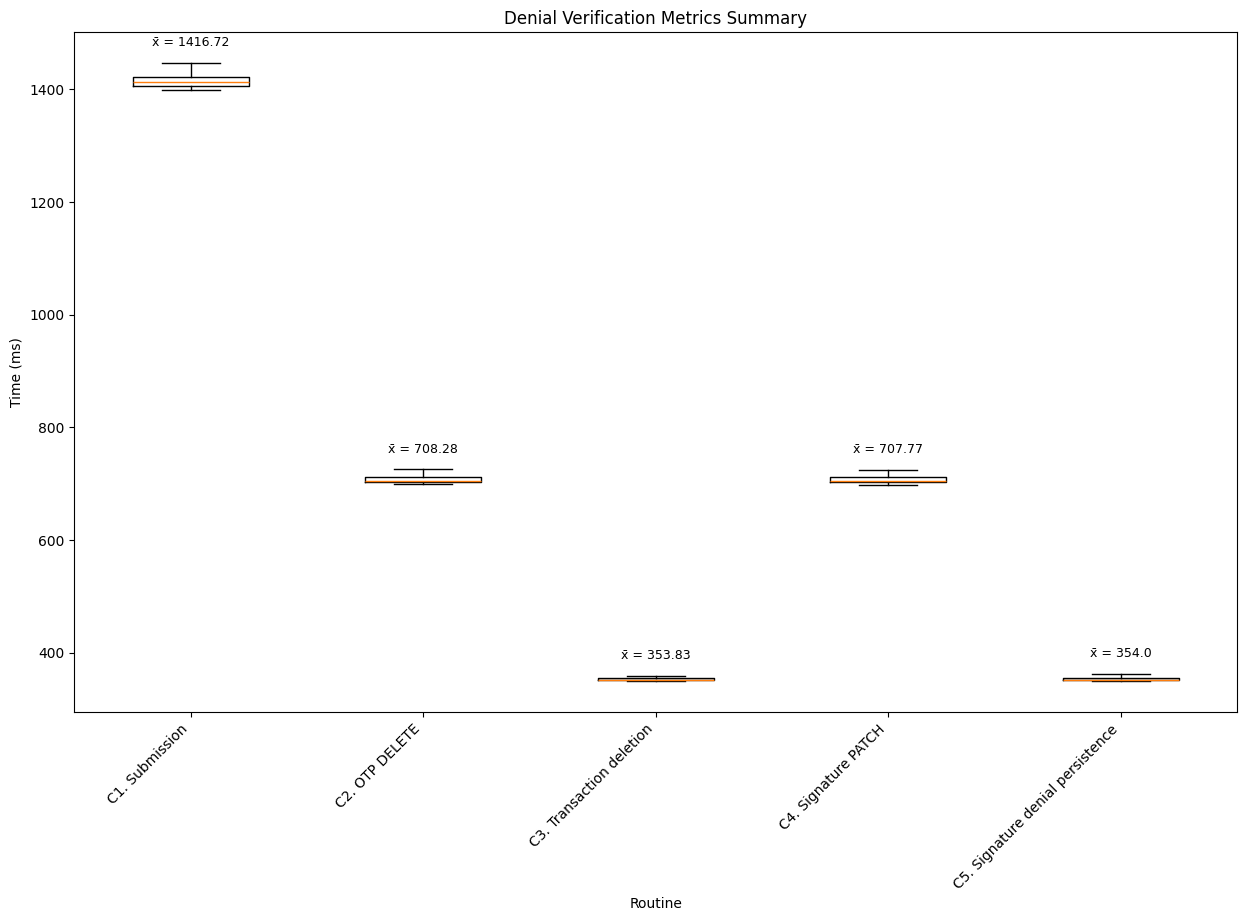

In [57]:
labels=[
    "C1. Submission",
    "C2. OTP DELETE",
    "C3. Transaction deletion",
    "C4. Signature PATCH",
    "C5. Signature denial persistence"
]

fig, ax = plt.subplots(figsize = (15, 10))
stats = cbook.boxplot_stats(data[16:21], labels=labels)
ax.bxp(stats, showfliers=False)
ax.set_title('Denial Verification Metrics Summary')
ax.set_xlabel('Routine')
ax.set_ylabel('Time (ms)')

upper =[]
for i in range(len(stats)):
    upper.append(stats[i]['whishi'])

routineMeans3 = routineMeans[16:21]
for i, v in enumerate(routineMeans3):
    plt.text(i+1, upper[i]+30, "x\u0304 = "+str(round(float(v), 2)), ha = 'center', fontsize=9)

fig.autofmt_xdate(rotation=45)
fig.show()

In [41]:
# calculate average time for each routine

routineMeans = []
routine_mean_times = dict()
for key in routine_key:
    holder = []
    holder.append(sum(routine_times[key]) / len(routine_times[key]))
    routineMeans.append(sum(routine_times[key]) / len(routine_times[key]))
    routine_mean_times[key] = holder

routine_mean_times

{'a1': [2487.123466662698],
 'a2': [1999.771945129445],
 'a3.1': [355.1808570309573],
 'a3.2': [1279.3860924850076],
 'a4': [469.53837683103944],
 'a5': [716.9500085890443],
 'a6': [354.8961865696161],
 'a7': [2304.2417469132797],
 'a8': [876.4957833228942],
 'a9': [366.5053002220509],
 'b1': [2372.937910690309],
 'b2': [2372.7177096985833],
 'b3': [352.6659504701648],
 'b4': [1313.162643889485],
 'b5.1': [353.73753516790305],
 'b5.2': [353.1889834445054],
 'c1': [1416.7231106620345],
 'c2': [708.2759619893642],
 'c3': [353.82609906889513],
 'c4': [707.7689616476714],
 'c5': [354.0021746355526],
 'd1': [178.04280500113964]}

In [42]:
routineNames = []
for i in range(len(routine_key)):
    routineNames.append(routine_key[i].upper())

pdNames = pd.Series(routineNames, name="Routine Code")
pdMeans = pd.Series(routineMeans, name="Avg. Elapsed Time")
df = pd.concat([pdNames, pdMeans], axis=1)
df



,Routine Code,Avg. Elapsed Time
0,A1,2487.123467
1,A2,1999.771945
2,A3.1,355.180857
3,A3.2,1279.386092
4,A4,469.538377
5,A5,716.950009
6,A6,354.896187
7,A7,2304.241747
8,A8,876.495783
9,A9,366.505300


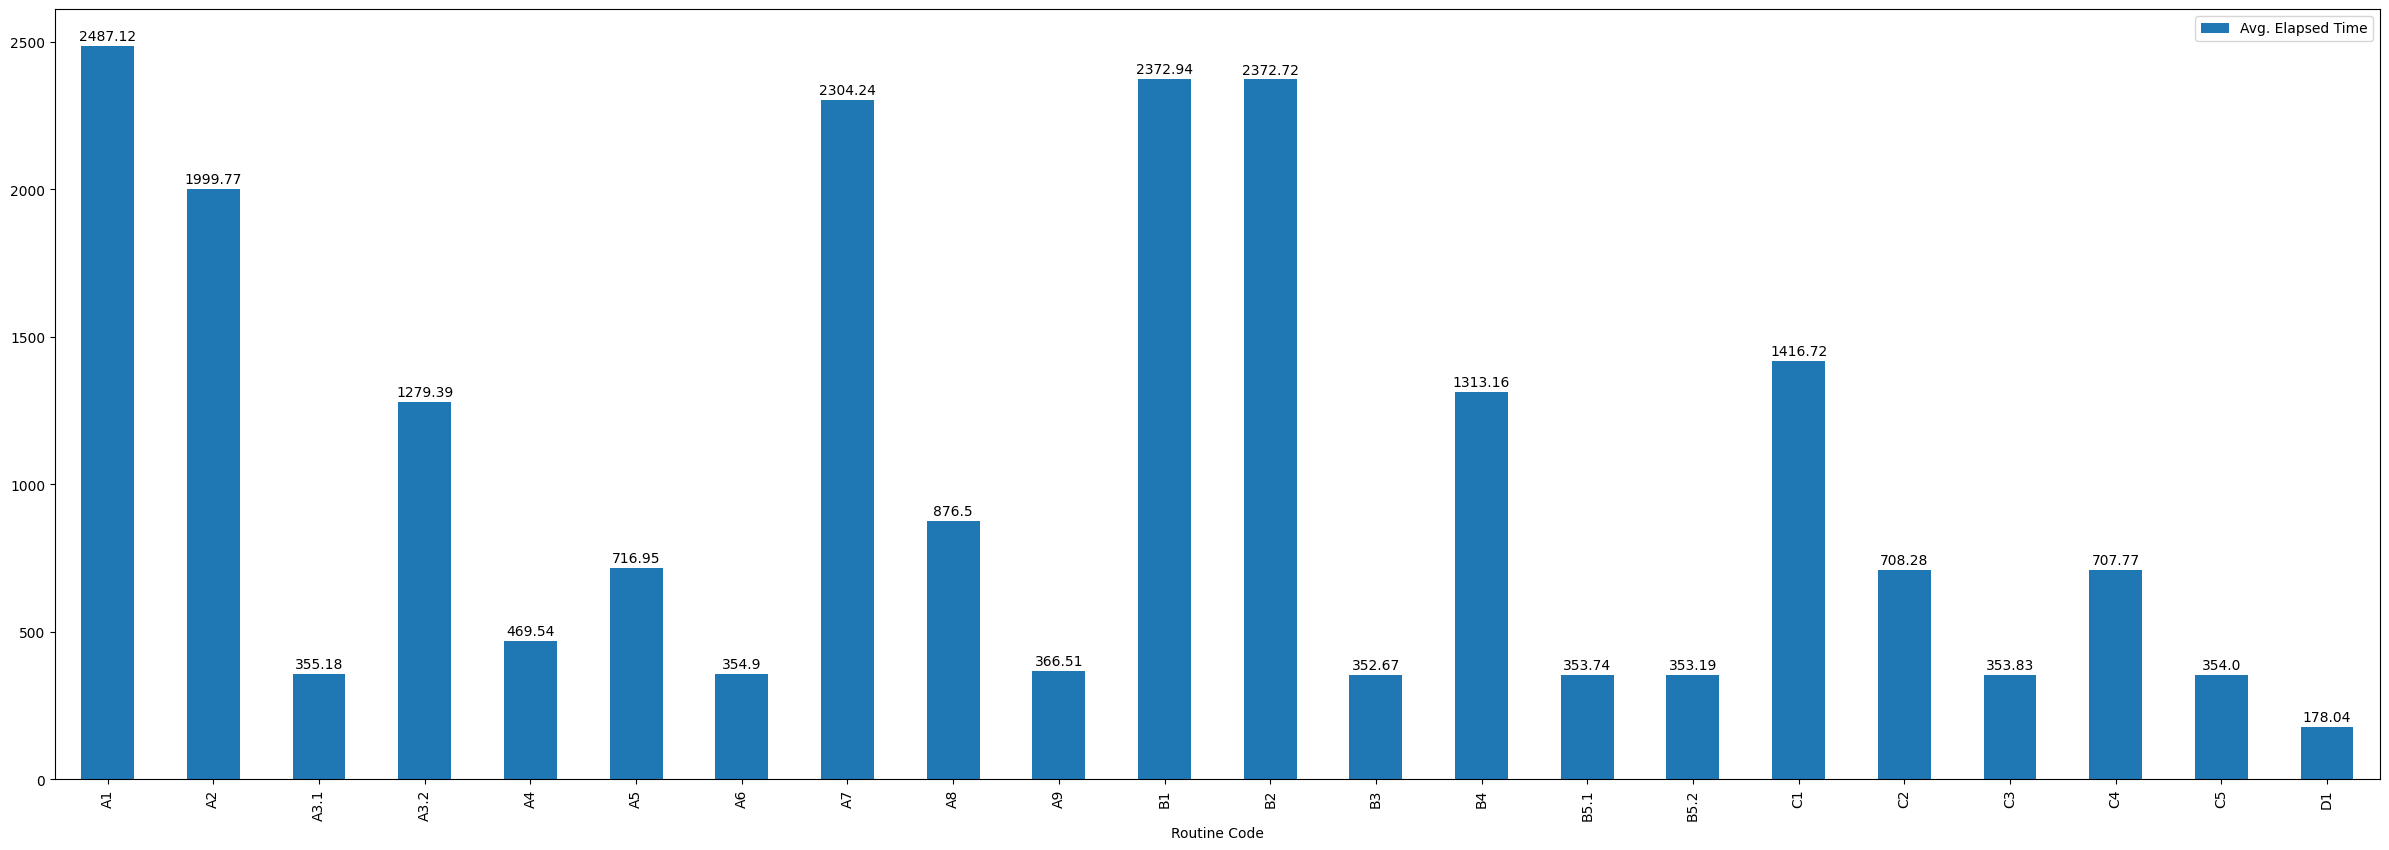

In [43]:
df.plot(kind = 'bar', 
        x = 'Routine Code', 
        y = 'Avg. Elapsed Time', 
        figsize=(30, 10))

for i, v in enumerate(df['Avg. Elapsed Time'].tolist()):
    plt.text(i, v+20, str(round(v, 2)), ha = 'center')

plt.show()

In [44]:
# calculate the total number of records for all routines
routine_totals = dict()

for key in sorted(list(routine_times.keys())):
    routine_totals[key] = len(routine_times[key])
    
routine_totals

{'a1': 7000,
 'a2': 7006,
 'a3.1': 7008,
 'a3.2': 7006,
 'a4': 7002,
 'a5': 6998,
 'a6': 6994,
 'a7': 6989,
 'a8': 6990,
 'a9': 6989,
 'b1': 3248,
 'b2': 3248,
 'b3': 3250,
 'b4': 3248,
 'b5.1': 2912,
 'b5.2': 2911,
 'c1': 3190,
 'c2': 3193,
 'c3': 3193,
 'c4': 3190,
 'c5': 3191,
 'd1': 1}

In [45]:
# calculate transactions per second

# b1 encapsulates all of b
routine_totals['b1']/(sum(routine_times['b1'])/1000)

0.42141852742750063

In [46]:
# c1 encapsulates all of c
routine_totals['c1']/(sum(routine_times['c1'])/1000)

0.7058542297179723

In [47]:
# file uploads 
routine_totals['a1']/(sum(routine_times['a1'])/1000)

0.4020709117999003

In [48]:
# signature upload

In [49]:
# calculate the success rate for the document upload routine

# find all document upload routines
import re

document_upload_routine_codes = sorted(list(filter(lambda x: re.match("a.*", x), routine_times.keys())))
document_upload_routine_codes

['a1', 'a2', 'a3.1', 'a3.2', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']

In [50]:
prev = ""
document_upload_ratios = dict()

for code in document_upload_routine_codes:
    if prev:
        print(f"{prev} to {code}: {len(routine_times[code])} / {len(routine_times[prev])}")
        document_upload_ratios[f"{prev} to {code}"] = len(routine_times[code]) / len(routine_times[prev])
    prev = code
    
document_upload_ratios[f"{document_upload_routine_codes[0]} to {document_upload_routine_codes[-1]}"] = len(routine_times[document_upload_routine_codes[-1]]) / len(routine_times[document_upload_routine_codes[0]]) 
    
document_upload_ratios

a1 to a2: 7006 / 7000
a2 to a3.1: 7008 / 7006
a3.1 to a3.2: 7006 / 7008
a3.2 to a4: 7002 / 7006
a4 to a5: 6998 / 7002
a5 to a6: 6994 / 6998
a6 to a7: 6989 / 6994
a7 to a8: 6990 / 6989
a8 to a9: 6989 / 6990


{'a1 to a2': 1.000857142857143,
 'a2 to a3.1': 1.0002854695974879,
 'a3.1 to a3.2': 0.9997146118721462,
 'a3.2 to a4': 0.9994290608050242,
 'a4 to a5': 0.9994287346472437,
 'a5 to a6': 0.9994284081166047,
 'a6 to a7': 0.9992851015155848,
 'a7 to a8': 1.000143081985978,
 'a8 to a9': 0.999856938483548,
 'a1 to a9': 0.9984285714285714}

In [51]:
document_approval_routine_codes = sorted(list(filter(lambda x: re.match("b.*", x), routine_times.keys())))
document_approval_routine_codes

['b1', 'b2', 'b3', 'b4', 'b5.1', 'b5.2']

In [52]:
prev = ""
document_approval_ratios = dict()

for code in document_approval_routine_codes:
    if prev:
        print(f"{prev} to {code}: {len(routine_times[code])} / {len(routine_times[prev])}")
        document_approval_ratios[f"{prev} to {code}"] = len(routine_times[code]) / len(routine_times[prev])
    prev = code
    
document_approval_ratios[f"{document_approval_routine_codes[0]} to {document_approval_routine_codes[-1]}"] = len(routine_times[document_approval_routine_codes[-1]]) / len(routine_times[document_approval_routine_codes[0]]) 
    
document_approval_ratios

b1 to b2: 3248 / 3248
b2 to b3: 3250 / 3248
b3 to b4: 3248 / 3250
b4 to b5.1: 2912 / 3248
b5.1 to b5.2: 2911 / 2912


{'b1 to b2': 1.0,
 'b2 to b3': 1.000615763546798,
 'b3 to b4': 0.9993846153846154,
 'b4 to b5.1': 0.896551724137931,
 'b5.1 to b5.2': 0.9996565934065934,
 'b1 to b5.2': 0.896243842364532}

In [53]:
document_denial_routine_codes = sorted(list(filter(lambda x: re.match("c.*", x), routine_times.keys())))
document_denial_routine_codes

['c1', 'c2', 'c3', 'c4', 'c5']

In [54]:
prev = ""
document_denial_ratios = dict()

for code in document_denial_routine_codes:
    if prev:
        print(f"{prev} to {code}: {len(routine_times[code])} / {len(routine_times[prev])}")
        document_denial_ratios[f"{prev} to {code}"] = len(routine_times[code]) / len(routine_times[prev])
    prev = code
    
document_denial_ratios[f"{document_denial_routine_codes[0]} to {document_denial_routine_codes[-1]}"] = len(routine_times[document_denial_routine_codes[-1]]) / len(routine_times[document_denial_routine_codes[0]])     

document_denial_ratios

c1 to c2: 3193 / 3190
c2 to c3: 3193 / 3193
c3 to c4: 3190 / 3193
c4 to c5: 3191 / 3190


{'c1 to c2': 1.0009404388714733,
 'c2 to c3': 1.0,
 'c3 to c4': 0.9990604447228312,
 'c4 to c5': 1.0003134796238244,
 'c1 to c5': 1.0003134796238244}